Описание проекта
<br>
Заказчик исследования — Министерство культуры Российской Федерации. 
<br>
Нам необходимо изучить рынок российского кинопроката и выявить текущие тренды. 
<br>
Основное внимание будет уделено фильмам, которые получили государственную поддержку. Необходимо будет оценить, насколько такие фильмы интересны зрителю, их кассовые сборы в кинотеатрах и окупаемость в прокате.
<br>
Работать мы будем с данными, опубликованными на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.

## Исследование данных о российском кинопрокате



### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

In [61]:
# Импортируем необходимые нам библиотеки
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [62]:
# Загрузим данные выбрав верный разделитель
data_1 = data = pd.read_csv('/datasets/mkrf_movies.csv', sep = ',')
data_2 = data = pd.read_csv('/datasets/mkrf_shows.csv', sep = ',')

In [63]:
# Ознакомимся с содержанием data_1
data_1.info()
data_1.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [64]:
# Ознакомимся с содержанием data_2
data_2.info()
data_2.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08


По объему информации таблицы существенно отличаются:
<br>
Первый датасет - 15 столбцов и 7486 строк, основной массив данных
<br>
Второй датасет - 2 столбца и 3158 строк, по сути один параметр, кассовые сборы.

Объединим таблицы.
<br>
Но перед этим приведем столбцы 'puNumber' к единому типу данных

In [65]:
# Приведем к единому формату тип данных 'puNumber', для чего поменяем его в data_1 на 'int'
#data_1['puNumber'] = data_1['puNumber'].astype('int') 
# Не получается поменять тип данных, т.к. в них есть нечисловое значение, отсортируем столбец
data_1['puNumber'].sort_values()

804      111004112
3962     111000110
4768     111000111
729      111000112
1128     111000113
           ...    
4355     226017410
3992     226019110
1011     231001012
5249     231001111
1797           нет
Name: puNumber, Length: 7486, dtype: object

In [66]:
# строка с индексом 1797 имеет №ПУ - "нет". Исправим 'нет' на 0
data_1.loc[1797, 'puNumber'] = '0'
# Проверим результат
data_1['puNumber'].sort_values()

804      111004112
1797             0
3962     111000110
4768     111000111
729      111000112
           ...    
1885     226014714
4355     226017410
3992     226019110
1011     231001012
5249     231001111
Name: puNumber, Length: 7486, dtype: object

In [67]:
# Вернемся к изменению типа данных data_1['puNumber'] на 'int'
data_1['puNumber'] = data_1['puNumber'].astype('int') 

Объединять таблицы будем путем присоединения второго датасета к первому использовав метод .merge(), how='left', для максимального сохранения первого датасета.

In [68]:
# Объединим таблицы. 
data = data_1.merge(data_2, on='puNumber', how='left')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

In [69]:
data.head(5)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


Количество столбцов стало 16, количество ненулевых значений box_office (3158) соответсвует количесву строк в data_1, следовательно объединение данных прошло корректно

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

Посмотрим соответствие типа данных в столбцах.
<br>
show_start_date - необходимо сменить на datetime
<br>
ratings - необходимо сменить на float

In [70]:
# Начнем с даты выхода в прокат
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format='%Y-%m-%dT%H:%M:%S.%fZ')

In [71]:
# Изменим тип в столбце 'ratings'
#data['ratings'] = data['ratings'].astype('float') 
# Не получилось, посмотрим уникальные значения
data['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

In [72]:
# Часть рейтингов указаны в процентах. Избавимся от знака '%' в значениях.  
data['ratings'] = data['ratings'].replace('\%', '', regex = True)
# Поменяем тип данных и понизим порядок двухзначных чисел
data['ratings']= data['ratings'].astype('float64') 
data.loc[data['ratings'] > 10, 'ratings'] = data['ratings']/10
data['ratings'].unique()

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, nan, 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       9.9, 4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6,
       4.2, 5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 2.8, 3.7, 1.4, 3.1, 9.7,
       3.5, 3.2, 1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 9.1, 9.4, 9. , 1.9,
       1. , 8.9, 1.3, 1.8, 1.2, 1.7, 9.8])

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7486 non-null   object        
 1   puNumber               7486 non-null   int64         
 2   show_start_date        7486 non-null   datetime64[ns]
 3   type                   7486 non-null   object        
 4   film_studio            7468 non-null   object        
 5   production_country     7484 non-null   object        
 6   director               7477 non-null   object        
 7   producer               6918 non-null   object        
 8   age_restriction        7486 non-null   object        
 9   refundable_support     332 non-null    float64       
 10  nonrefundable_support  332 non-null    float64       
 11  budget                 332 non-null    float64       
 12  financing_source       332 non-null    object        
 13  rat

Типы данных в датасете соответствует содержанию

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

In [74]:
data.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    976
box_office               4328
dtype: int64

Анализ пропусков по столбцам:
<br>
film_studio - 18 пропусков. Заполним их заглушкой "Не указано"
<br>
production_country - 2 пропуска, удалим эти строки
<br>
director - 9 пропусков, удалим эти строки
<br>
<br>
producer - 568 пропусков, придется оставить как есть. Пропусков много, а нормального источника для заполнения нет. Заполним их заглушкой "Не указано"
<br>
<br>
refundable_support - 7154 пропуска
<br>
nonrefundable_support - 7154 пропуска
<br>
budget - 7154 пропуска
<br>
financing_source - 7154 пропуска
<br>
Одинаковое количество пропуков означает, что источник данных единый для них. Заполнить пропуски, не имея схожего источника по остальным проектам, не получится.
<br>
<br>
ratings - 967 пропусков
<br>
genres - 976 пропусков
<br>
Оставим как есть. Не пересматривать же их для определения жанра и выставления оценки!

box_office - 4328 пропусков. Оставляем.


In [122]:
# Обработаем пропуски как мы решили по результатам анализа
data['film_studio'] = data['film_studio'].fillna('Не указано')
data['producer'] = data['producer'].fillna('Не указано')
data.dropna(subset=['production_country'])
data.dropna(subset=['director'])
data.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                 0
production_country          2
director                    9
producer                    0
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    976
box_office               4328
year                        0
main_director               9
main_genres               976
budget_support_ratio     7154
box_office_mln           4328
dtype: int64

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

In [75]:
# Проверим на наличие явных дубликатов
data.duplicated().sum()

0

In [76]:
# В процессе объединения таблиц, обратил внимание на дубликаты по названию проета ('title'). Проверим на дубликаты по названию
data['title'].duplicated().sum()
data[data['title'].duplicated(keep=False)].head(30)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2,Особо опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
12,Малышка на миллион /По мотивам рассказов Ф.Х.Т...,221011415,2015-04-03 12:00:00,Художественный,"Уорнер Бразерс, Лейкшор Интертейнмент, Малпасо...",США,Клинт Иствуд,"Клинт Иствуд, Том Розенберг, Альберт С.Рудди, ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,8.1,"драма,спорт",NaN
26,Оружейный барон,221012515,2015-04-03 12:00:00,Художественный,"Вэ И Пэ Медиенфондс 3, Асендант Пикчерз, Сатур...",США - Франция - Турция,Эндрю Никкол,"Норман Голуайтли, Энди Грош, Николас Кейдж, Эн...",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.7,"боевик,драма,криминал",NaN
33,Перелом,221006016,2016-02-09 12:00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Касл Рок Инте...",США-Германия,Грегори Хоблит,Чарльз Уэйнсток,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.7,"триллер,драма,криминал",NaN
34,Мисс Поттер,221011915,2015-04-03 12:00:00,Художественный,"Феникс Пикчерз, Дэвид Киршнер Продакшнз, Айл о...",США - Великобритания,Крис Нунан,"Дэвид Киршнер, Майк Медэвой, Арнольд Мессер, К...",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.3,"драма,мелодрама,биография",NaN
37,Молчи в тряпочку,221012015,2015-04-03 12:00:00,Художественный,"Саммит Интертейнмент, Айл оф Мэн Филм, Эйзур Ф...",Великобритания,Найл Джонсон,"Мэтью Пэйн, Джулия Пэло",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.1,"комедия,криминал",NaN
40,Алекс и Эмма,221005015,2015-02-25 12:00:00,Художественный,"Эскейп Артистс, Франчайз Пикчерз, Рейнер-Грэйс...",США,Роб Райнер,"Тодд Блэк, Элан Грейсман, Джереми Левен, Роб Р...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.4,"мелодрама,комедия",NaN
41,Алекс и Эмма,221004616,2016-02-09 12:00:00,Художественный,"Эскейп Артистс, Франчайз Пикчерз, Рейнер-Грэйс...",США,Роб Райнер,"Тодд Блэк, Элан Грейсман, Джереми Левен, Роб Р...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.4,"мелодрама,комедия",NaN


У выявленных дубликатов различаются прокатные удоставерения и даты выхода в прокат. Вероятно, фильмы могут выходить в прокат не единожды и каждый раз оформляется новое прокатное удостоверение. Удалять их пока не будем, т.к. нет информации какой прокат считать основным.
<br>
Посмотрим что с дубликатами прокатных удостоверений

In [77]:
data['puNumber'].duplicated().sum()
data[data['puNumber'].duplicated(keep=False)].head(30)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.0,"мелодрама,комедия",NaN
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"драма,мелодрама,история",NaN
5067,Анализируй это!,221054410,2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.4,"комедия,криминал",NaN
5068,Анализируй то!,221054410,2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.8,"комедия,криминал",NaN


Есть две ситуации когда под одним и тем же прокатным удостоверением (ПУ) идут по два фильма. В одном случае УП выдано на фильм в двух частях (вероятно), в другом - на два разных фильма. Оставляем строки, одинаковые ПУ нам не мешают, т.к. ПУ нам были необходимы для подгрузки кассовых сборов, а по этим фильмам информации по кассовым сборам у нас нет.

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

In [78]:
# Выведем информацию для наглядности
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7486 non-null   object        
 1   puNumber               7486 non-null   int64         
 2   show_start_date        7486 non-null   datetime64[ns]
 3   type                   7486 non-null   object        
 4   film_studio            7468 non-null   object        
 5   production_country     7484 non-null   object        
 6   director               7477 non-null   object        
 7   producer               6918 non-null   object        
 8   age_restriction        7486 non-null   object        
 9   refundable_support     332 non-null    float64       
 10  nonrefundable_support  332 non-null    float64       
 11  budget                 332 non-null    float64       
 12  financing_source       332 non-null    object        
 13  rat

In [79]:
# Изучим категориальные столбцы по уникальным значениям
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

In [80]:
data['production_country'].unique()

array(['США', 'СССР', 'Франция', 'СССР, Венгрия',
       'Германия-Великобритания', 'Великобритания - Италия',
       'Чехословакия', 'США - Франция - Турция', 'Новая Зеландия',
       'Канада - Франция - Испания', 'США-Германия',
       'США - Великобритания', 'Великобритания', 'США - Германия',
       'Франция - Мексика - США', 'Россия, Казахстан, США',
       'СССР, Швеция', 'СССР, Франция, Англия, Куба, ГДР', 'Германия',
       'Великобритания-США-Германия-КНР',
       'СССР, ЧССР, Западный Берлин, ПНР', 'СССР, Италия', 'Гонконг, КНР',
       'США - Франция', 'США - Япония - Франция - Великобритания',
       'Гонконг - Сингапур - Таиланд - Великобритания', 'США-Канада',
       'Франция - Италия - Великобритания - США', 'Франция - США',
       'Ирландия-Великобритания-Германия', 'Чехия', 'США-Австралия',
       'СССР, Финляндия', 'США-Франция-Великобритания-Австрия',
       'США - Бельгия', 'США - Ирландия - Великобритания',
       'Великобритания - США',
       'Люксембург - Нидерл

In [81]:
data['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

In [82]:
data['financing_source'].unique()

array([nan, 'Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

In [83]:
data['genres'].unique()

array(['боевик,драма,мелодрама', 'драма,военный',
       'фантастика,боевик,триллер', 'драма', 'мелодрама,комедия',
       'мюзикл,мелодрама,комедия', 'комедия,криминал',
       'боевик,триллер,детектив', 'боевик,драма,приключения',
       'драма,спорт', 'триллер,драма,мелодрама', 'комедия,мелодрама',
       'драма,мелодрама,комедия', 'драма,мелодрама', 'драма,история',
       'драма,мелодрама,семейный', 'комедия,мелодрама,криминал',
       'комедия', 'боевик,драма,криминал', 'драма,комедия',
       'ужасы,фантастика,комедия', 'мультфильм,короткометражка,мелодрама',
       'драма,криминал', 'мультфильм,фантастика,фэнтези',
       'триллер,драма,криминал', 'драма,мелодрама,биография',
       'драма,комедия,военный', 'фантастика,драма,детектив',
       'мюзикл,семейный', nan, 'военный,приключения,драма',
       'документальный,драма', 'драма,биография,история',
       'боевик,триллер,драма', 'фэнтези,боевик',
       'боевик,комедия,криминал', 'мюзикл,комедия,детский',
       'комедия,мел

In [84]:
# Проблемы с пробелами выявлены в столбце 'type'. Решим их.
data['type'] = data['type'].str.strip()

In [85]:
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

In [86]:
data['film_studio'].unique()

array(['Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикчерз, Тиг Продакшнз',
       'Киностудия "Мосфильм"',
       'Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз',
       ...,
       'Дэниел Гродник Продакшнз, Вандерфилм Медиа Корпорэйшн, Импринт Интертейнмент, Вор Хорс Интертейнмент, Пимиента ',
       'Никелодеон Анимейшн Студиос, Спин Мастер',
       'Анимаккорд Лтд., ООО Студия "АНИМАККОРД"'], dtype=object)

In [87]:
data['director'].unique()

array(['Кевин Костнер', 'Е.Матвеев', 'Тимур Бекмамбетов', ...,
       'Ник Пауэлл', 'А.Беляев', 'И.Трусов'], dtype=object)

In [88]:
data['producer'].unique()

array(['Дэвид Валдес, Кевин Костнер, Джейк Эбертс', nan,
       'Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит', ...,
       'Поппи Бегум, Ник Пойнц',
       'Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэт Саксон, Кирк Шоу',
       'Дженнифер Додж'], dtype=object)

Частая проблема категориальных наших данных в том, что во многих ячейках перечислено несколько значений через запятую. 
<br>
Причина этого вероятно в разных стандартах в сборе информации и различные источники данных.
<br>
Очевидно, что первое значение из перечисленных можно считать основным. Далее мы выделим в отдельные столбцы основных режиссеров и жанры. Страна производства в исследованих ограничится значением Россия, т.к. мы будем изучать фильмы с российским государственным субсидированием. Другие проблемные категориальные данные нам не мешают в нашем исследовании.

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

Пользуясь подсказкой, проверим как выполняется условие 'budget' >= 'refundable_support' + 'nonrefundable_support'?


In [89]:
# Изучим строки не выполняющие это условие
data[(data['refundable_support'] + data['nonrefundable_support']) > data['budget']]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,111023614,2014-12-19 12:00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.0,23000000.0,0.0,"Министерство культуры, Фонд кино",6.6,мелодрама,1.023402e+07
2058,Дуxless 2,111000415,2015-01-26 12:00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,75000000.0,0.0,Фонд кино,6.6,драма,4.461635e+08
2472,Воин (2015),111017315,2015-09-28 12:00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.0,70000000.0,0.0,Фонд кино,7.8,"боевик,драма,криминал",1.965724e+08
2532,Бармен.,111009615,2015-05-26 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.0,0.0,0.0,Фонд кино,6.2,"комедия,фэнтези",6.741897e+07
2615,Савва. Сердце воина,114001715,2015-07-21 12:00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000.0,100000000.0,0.0,Фонд кино,4.6,"мультфильм,приключения,фэнтези",1.844876e+08
2684,Тряпичный союз,111010215,2015-06-08 12:00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.0,59000000.0,0.0,Фонд кино,6.3,"комедия,драма",1.957739e+06
2788,Срочно выйду замуж,111017115,2015-09-30 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,35000000.0,0.0,Фонд кино,5.1,"комедия,мелодрама",7.293778e+07
2874,Помню - не помню!,111004916,2016-03-01 12:00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.0,6000000.0,0.0,Министерство культуры,4.3,комедия,1.536293e+07
3047,Любовь с ограничениями,111008216,2016-04-29 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19000000.0,51000000.0,0.0,Фонд кино,6.3,"комедия,мелодрама",7.029905e+07
3565,Притяжение (2016),111018116,2016-12-16 12:00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.0,250000000.0,0.0,Фонд кино,5.6,фантастика,1.038321e+09


17 строк. Во всех общий бюджет равен 0, при этом в столбцах 'refundable_support' и 'nonrefundable_support' суммы фигурируют.
<br>
Далее по плану исследования у нас определение доли государственной поддержки в общем бюджете. Предлагаю позже вырнуться к исправлению данных по бюджету в этих 17 строках

<AxesSubplot:>

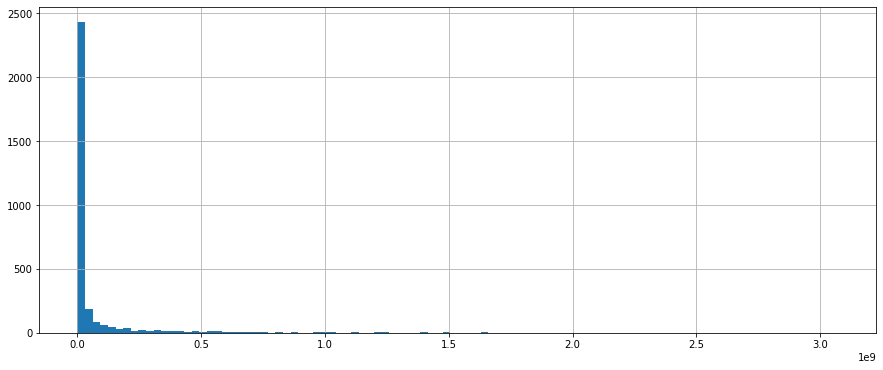

In [90]:
# Изучим данные по сборам
data['box_office'].hist(figsize=(15,6), bins=100)


Серьезный пик на минимальных значениях. Посмотрим детальнее гистограмму.

<AxesSubplot:>

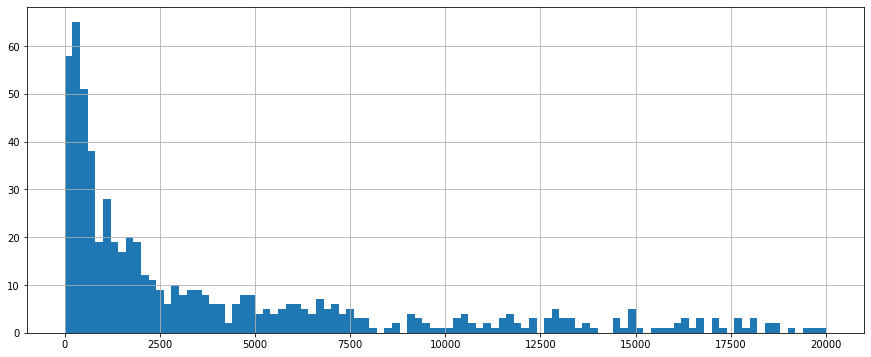

In [91]:
data['box_office'].hist(figsize=(15,6), bins=100, range=(0,20000))

Ограничив вывод 20 тыс.рублей мы наблюдаем множество фильмов со сборами меньше 2500 рублей. Выведем эти строки для анализа.

In [92]:
data[data['box_office'] < 2500].head(50)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
18,Неподдающиеся,111003616,2016-02-12 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Ю.Чулюкин,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,8.0,"мелодрама,комедия",360.0
19,Неподсуден,111003716,2016-02-12 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,"В.Краснопольский, В.Усков",NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,420.0
22,"Операция ""Ы"" и другие приключения Шурика",111007413,2013-10-18 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Л.Гайдай,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,8.7,"комедия,мелодрама,криминал",380.0
38,Мужики!..,111007213,2013-10-18 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,И.Бабич,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,8.1,драма,1165.0
52,Айболит - 66,111010513,2013-12-19 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Ролан Быков,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.1,"мюзикл,комедия,детский",1795.0
61,Американская дочь,111005515,2015-04-23 12:00:00,Художественный,"АО ""Караван"", Компания ""Америкен Дистрибьюшн"",...","Россия, Казахстан, США",К.Шахназаров,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.0,"драма,комедия",300.0
66,Анна Павлова,111011013,2013-12-19 12:00:00,Художественный,"совместное производство Киностудия ""Мосфильм"",...","СССР, Франция, Англия, Куба, ГДР",Эмиль Лотяну,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,"драма,биография,музыка",0.0
68,Алые паруса,111010913,2013-12-19 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,А.Птушко,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.8,"фэнтези,драма,мелодрама",1850.0
75,Борис Годунов,111012213,2013-12-19 12:00:00,Художественный,"Киностудия ""Мосфильм"", ""Баррандов"" (ЧССР) при...","СССР, ЧССР, Западный Берлин, ПНР",С.Бондарчук,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.2,драма,420.0
78,Будьте моим мужем,111012413,2013-12-19 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,А.Сурикова,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.4,комедия,200.0


In [93]:
data[data['box_office'] < 2500].describe()

,puNumber,refundable_support,nonrefundable_support,budget,ratings,box_office
count,3.640000e+02,1.0,1.0,1.0,350.000000,364.000000
mean,1.245320e+08,0.0,35000000.0,91000000.0,6.476857,842.065934
std,2.686954e+07,NaN,NaN,NaN,1.231816,682.352454
min,1.110001e+08,0.0,35000000.0,91000000.0,1.500000,0.000000
25%,1.110102e+08,0.0,35000000.0,91000000.0,5.900000,286.250000
50%,1.210094e+08,0.0,35000000.0,91000000.0,6.600000,620.000000
75%,1.210229e+08,0.0,35000000.0,91000000.0,7.400000,1315.000000
max,2.240264e+08,0.0,35000000.0,91000000.0,9.100000,2490.000000


В выборку попадает много старых фильмов (времен СССР), для которых оформлялись ПУ для разовых показов (предположение), соответсвенно эта разовая выручка попадает исследования. Вроде логично, если бы не попадание в срез проекта с бюджетом 91 млн (из них 35 млн рублей госсубсидий) и кассовыми сборами 2490 рублей. Возможно, имеет место неверный порядок в некоторых значениях кассовых сборов. Посмотрим сколько фильмов со сборами менее 8000 рублей имеют государственное софинансирование.

In [94]:
# Сделаем срез фильмов со сборами менее 8000 рублей и с государственным софинансированием
data[(data['box_office'] < 8000) & ((data['refundable_support'] > 0) | (data['nonrefundable_support'] > 0))]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2527,Вдвоем на льдине.,111011015,2015-06-25 12:00:00,Художественный,"ООО ""Первое творческое объединение""",Россия,"Н.Джорджадзе, В.Игнатьев","П.Поляков, И.Букреев",«12+» - для детей старше 12 лет,0.0,26500000.0,37943652.0,Министерство культуры,6.6,мелодрама,4450.0
2803,Битва с экстрасенсами,111011315,2015-07-20 12:00:00,Художественный,"ООО ""КИНОДАНЦ"", ООО ""КИНОБАЙТ""",Россия,И.Кордзаия,Е.Мелентьев,«12+» - для детей старше 12 лет,0.0,25900000.0,59560746.0,"Министерство культуры, Фонд кино",5.4,"фэнтези,приключения",6000.0
3149,Я-Учитель,111019715,2015-12-02 12:00:00,Художественный,"НП Киностудия детских и юношеских фильмов ""Иль...",Россия,С.Мокрицкий,А.Ковтунец,«12+» - для детей старше 12 лет,0.0,35000000.0,91000000.0,Министерство культуры,7.4,"мелодрама,комедия",1550.0


В выборку попадают три фильма с бюджетами 40-90 млн рублей и сборами менее 8 тысяч. Возможно это ошибка в порядке сумм кассовых сборов, а возможно бизнес-модель подобных проектов предусматривает иные источники выручки для окупаемости. Как поступить в данном случае не понятно, таких фильмов не много, поэтому оставим как есть.

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [95]:
data['year'] = data['show_start_date'].dt.year
data.head(5)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year
0,Открытый простор,221048915,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN,2015
1,Особо важное задание,111013716,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN,2016
2,Особо опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016
3,Особо опасен,221026916,2016-06-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016
4,Особо опасен,221030815,2015-07-29 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2015


- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [96]:
def add_main(data, columns):
    for column in columns:
        data[f'main_{column}'] = data[column].dropna().apply(lambda x: x.split(',')[0])
    return data

In [97]:
data = add_main(data, ['director', 'genres'])

- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [98]:
# Создадим столбец с долей государственного софинансирования и оценим распределение полученных данных
data['budget_support_ratio'] = (data['refundable_support'] + data['nonrefundable_support']) / data['budget']
data['budget_support_ratio'].describe()

count    332.000000
mean            inf
std             NaN
min        0.044043
25%        0.384615
50%        0.614038
75%        0.661412
max             inf
Name: budget_support_ratio, dtype: float64

Из-за наличия строк с нулевым бюджетом некоторые параметры распределения нам не доступны. Вернемся к исправлению этих строк, будем использовать полученное медианное значение 0.614

In [99]:
# Исправим данные 'budget' в 17 строках с нулевым бюджетом на медианное значение с учетом доли государственного софинансирования 
data.loc[data['budget'] == 0, 'budget'] = (data['refundable_support'] + data['nonrefundable_support']) / 0.614

In [100]:
# Оценим рапределение после исправлений
data['budget_support_ratio'] = (data['refundable_support'] + data['nonrefundable_support']) / data['budget']
data['budget_support_ratio'].describe()

count    332.000000
mean       0.522333
std        0.166986
min        0.044043
25%        0.384615
50%        0.613345
75%        0.654613
max        0.784745
Name: budget_support_ratio, dtype: float64

Доля государственного софинансирования варируется от 4% до 78% суммы общего бюджета, при медианном и среднем значениях 61% и 52% соответственно.

### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах. Проанализируйте, как эта доля менялась по годам. Сделайте вывод о том, какой период полнее всего представлен в данных.

In [101]:
# Сгрупперуем данные по выходу фильмов и их сборам по годам 
cinema_films_years = data.pivot_table(index='year', values=['title', 'box_office'], aggfunc='count')
cinema_films_years

,box_office,title
year,,
2010,105,985
2011,109,622
2012,128,593
2013,184,630
2014,279,807
2015,465,705
2016,526,818
2017,357,505
2018,475,891


In [102]:
# Добавим столбец с долей фильмов с информацией по кассовым сборам
cinema_films_years['ratio'] = cinema_films_years['box_office'] / cinema_films_years['title']
cinema_films_years

,box_office,title,ratio
year,,,
2010,105,985,0.106599
2011,109,622,0.175241
2012,128,593,0.215852
2013,184,630,0.292063
2014,279,807,0.345725
2015,465,705,0.659574
2016,526,818,0.643032
2017,357,505,0.706931
2018,475,891,0.533109


<AxesSubplot:title={'center':'Доля фильмов с кассовыми сборами'}, xlabel='year'>

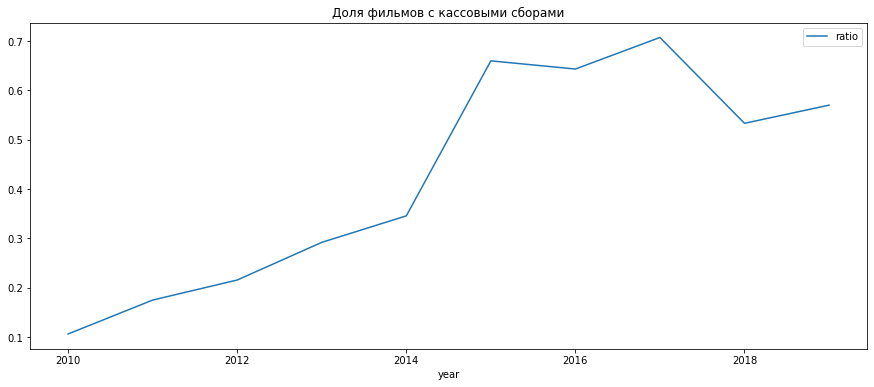

In [103]:
# Выведем график доли фильмов с кассовыми сборами по годам
cinema_films_years.plot(y='ratio', figsize = (15,6), title = 'Доля фильмов с кассовыми сборами')

Доля фильмов с информацией о кассовых сборовплавно растет с 2010 по 2019 году от 10% до 60%. С интервалом опережающего роста в 2015-2017 годах когда доля составляла 65-70%.

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

In [104]:
# Переведем данные по сборам в млн.рублей
data['box_office_mln'] = round(data['box_office']/1000000,2)

In [105]:
# Сгрупперуем данные по кассовым сборам по годам 
box_office_years = data.pivot_table(index='year', values='box_office_mln', aggfunc='sum')
box_office_years

,box_office_mln
year,
2010,2.36
2011,14.04
2012,6.90
2013,29.68
2014,7444.82
2015,39497.25
2016,47866.34
2017,48563.73
2018,49668.39


<AxesSubplot:title={'center':'Кассовые сборы по годам'}, xlabel='year'>

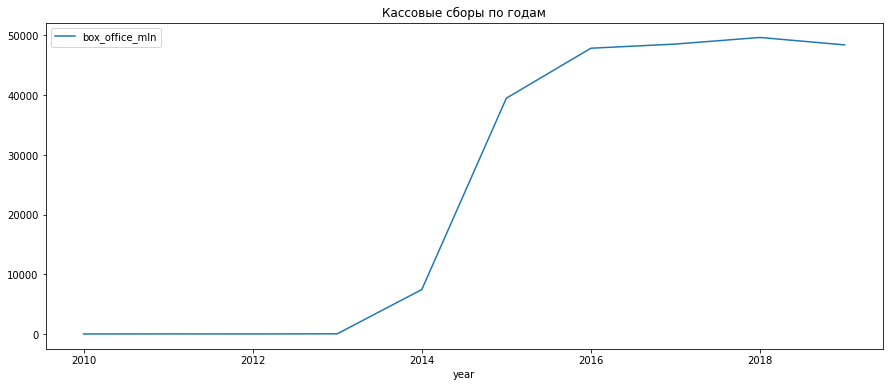

In [106]:
# Выведем график с кассовыми сборами по годам
box_office_years.plot(figsize = (15,6), title = 'Кассовые сборы по годам')

По имеющейся информации ежегодные общие кассовые сборы в 2010-2013 годах составляли не более 20 млн. рублей, затем за период 2014-2016 наблюдается выход на уровень 48-50 млрд рублей, т.е рост ежегодных сборов в тысячи раз! В 2016-2019 сборы остаются на этом уровне (50 млрд рублей). Причина вероятно в ограниченном учете сборов до 2016 года.

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [107]:
box_office_mean_years = data.pivot_table(index='year', values='box_office_mln', aggfunc=('median', 'mean'))
box_office_mean_years

,mean,median
year,,
2010,0.022476,0.000
2011,0.128807,0.000
2012,0.053906,0.010
2013,0.161304,0.000
2014,26.683943,0.020
2015,84.940323,4.920
2016,91.000646,3.850
2017,136.032857,9.970
2018,104.565032,8.890


<AxesSubplot:title={'center':'средняя и медианная сумма сборов по годам'}, xlabel='year'>

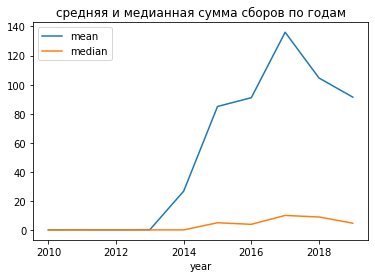

In [108]:
box_office_mean_years.plot(title = 'средняя и медианная сумма сборов по годам')

Значительное расхождение средних и медианных значений сборов с условного фильма свидетельствует о наличии успешных проектов с аномально высокими кассовыми сборами, при том что в целом сборы большинства фильмов не превышают 10 млн рублей 

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

In [109]:
# Сгрупперуем данные по возрастным ограничениям и медианным сборам 
age_restriction_years = data.loc[data['year'] >= 2015].pivot_table(index='year', columns='age_restriction', values='box_office_mln', aggfunc='median')
age_restriction_years

age_restriction,«0+» - для любой зрительской аудитории,«12+» - для детей старше 12 лет,«16+» - для детей старше 16 лет,«18+» - запрещено для детей,«6+» - для детей старше 6 лет
year,,,,,
2015,2.94,15.350,4.675,4.615,20.380
2016,2.57,4.695,5.135,6.110,3.025
2017,22.18,9.010,9.700,8.210,51.990
2018,3.62,8.930,9.010,7.180,14.690
2019,3.89,3.410,3.210,5.600,12.880


<AxesSubplot:title={'center':'Кассовые сборы по возрастным ограничениям по годам'}, xlabel='year'>

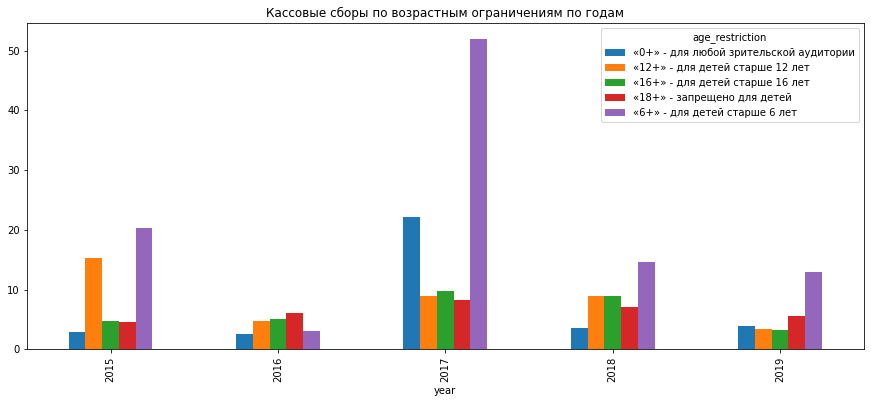

In [110]:
# Выведем график с медианным значением кассового сбора в зависимости от маркировки возрастного ограничения
age_restriction_years.plot(figsize = (15,6), title = 'Кассовые сборы по возрастным ограничениям по годам', kind='bar')

Самые высокие кассовые сборы у фильмов маркированных как 6+. Возможно, эта маркировка гарантирует максимальный охват аудитории, не в ущерб художественной привлекательности проекта.

In [111]:
# Сгрупперуем данные по возрастным ограничениям и сумме кассовых сборов по годам 
age_restriction_years_sum = data.loc[data['year'] >= 2015]\
.pivot_table(index='year', columns='age_restriction', values='box_office_mln', aggfunc='sum')
age_restriction_years_sum

age_restriction,«0+» - для любой зрительской аудитории,«12+» - для детей старше 12 лет,«16+» - для детей старше 16 лет,«18+» - запрещено для детей,«6+» - для детей старше 6 лет
year,,,,,
2015,379.05,13616.05,11368.09,5432.29,8701.77
2016,150.19,12204.46,16664.60,6793.93,12053.16
2017,229.60,7851.44,18745.02,9651.52,12086.15
2018,32.45,14267.31,16503.62,8760.04,10104.97
2019,17.75,12680.19,12753.42,10121.83,12852.56


<AxesSubplot:title={'center':'Суммарные кассовые сборы по возрастным ограничениям по годам'}, xlabel='year'>

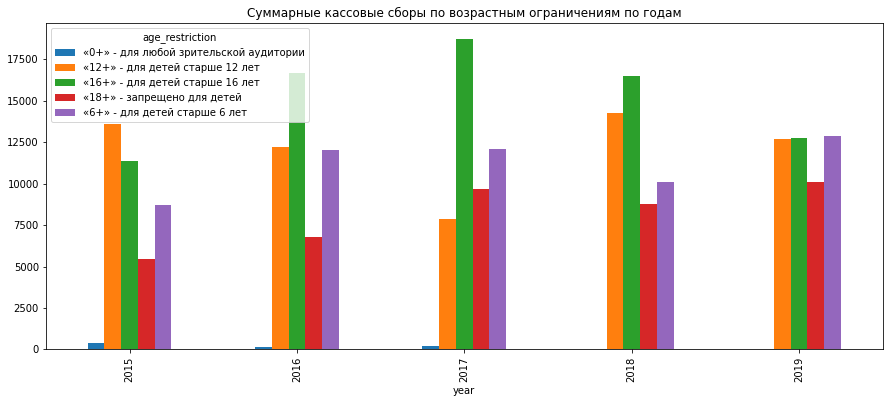

In [112]:
# Выведем график с суммарными кассовыми сборами в зависимости от маркировки возрастного ограничения
age_restriction_years_sum.plot(figsize = (15,6),\
                               title = 'Суммарные кассовые сборы по возрастным ограничениям по годам', kind='bar')

По суммарным сборам фильмов в зависимости от маркировки лидируют обычно фильмы 16+, 12+ и 6+.

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

Для данного этапа исследований подготовим отдельную таблицу с субсидированными проектами

In [113]:
data_sup = data.loc[data['budget_support_ratio'] > 0]
data_sup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 1281 to 7478
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  332 non-null    object        
 1   puNumber               332 non-null    int64         
 2   show_start_date        332 non-null    datetime64[ns]
 3   type                   332 non-null    object        
 4   film_studio            332 non-null    object        
 5   production_country     332 non-null    object        
 6   director               332 non-null    object        
 7   producer               330 non-null    object        
 8   age_restriction        332 non-null    object        
 9   refundable_support     332 non-null    float64       
 10  nonrefundable_support  332 non-null    float64       
 11  budget                 332 non-null    float64       
 12  financing_source       332 non-null    object        
 13  r

In [114]:
# Удалим строки не имеющие данных по сборам
data_sup = data_sup.dropna(subset=['box_office'])
# Добавим параметр окупаемости проекта
data_sup['payback'] = data_sup['box_office'] / data_sup['budget']

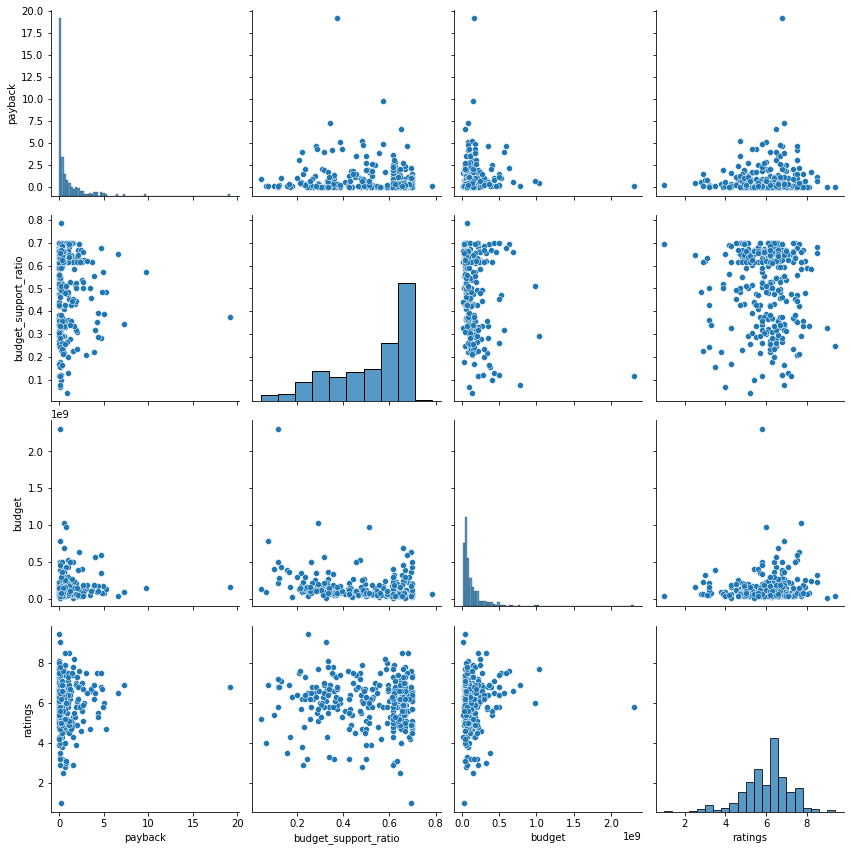

In [115]:
# Оценим корреляцию окупаемости с бюджетом, рейтингом и долей субсидий в бюджете.
sns.pairplot(data_sup, vars=['payback', 'budget_support_ratio', 'budget', 'ratings'], height=3)

Явной корреляции не наблюдается

In [116]:
# Подтвердим это коэффициентами 
correlations = data_sup.loc[:, ['payback', 'budget_support_ratio', 'budget', 'ratings']].corr()
correlations['payback']

payback                 1.000000
budget_support_ratio   -0.099397
budget                  0.087165
ratings                 0.061905
Name: payback, dtype: float64

<AxesSubplot:title={'center':'Средняя окупаемость проектов с государственным софинансированием по годам'}, xlabel='year'>

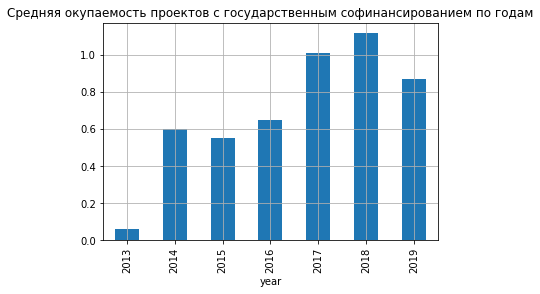

In [117]:
# Оценим среднюю окупаемость проектов с государственным софинансированием по годам
data_sup.groupby('year')['payback'].mean().plot(kind='bar', grid=True, title='Средняя окупаемость проектов с государственным софинансированием по годам')

Наблюдается явный тренд с ростом показателя по годам

<AxesSubplot:title={'center':'Средняя окупаемость проектов с государственным софинансированием по жанрам'}, xlabel='main_genres'>

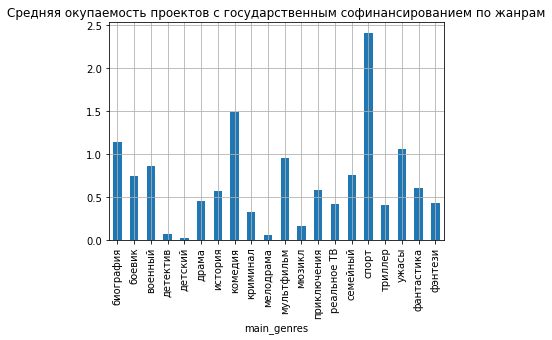

In [118]:
# Оценим среднюю окупаемость проектов с государственным софинансированием по жанрам
data_sup.groupby('main_genres')['payback'].mean().\
plot(kind='bar', grid=True, title='Средняя окупаемость проектов с государственным софинансированием по жанрам')

Спортивные драммы, байопики и комедии - фавориты эффективности государственных инвестиций в производство кино. 
<br>
Детские фильмы и мелодраммы - возможно больше социальные проекты, чем кинобизнес. Однако мульфильмы окупаются гораздо лучше, что странно, возможно проблема в выборе основного жанра проектов.

<AxesSubplot:title={'center':'Средний размер возвратных и невозвратных субсидий проектов'}, xlabel='year'>

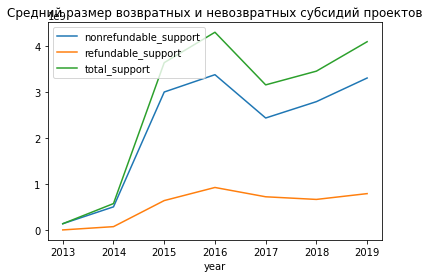

In [119]:
# Оценим средний размер субсидий проектов по годам
data_sup['total_support'] = data_sup['refundable_support'] + data_sup['nonrefundable_support']
data_sup.pivot_table(index='year', values=['total_support', 'refundable_support', 'nonrefundable_support'], \
                     aggfunc='sum').plot(title='Средний размер возвратных и невозвратных субсидий проектов')


С 2013 по 2015 год наблюдается рост государственного субсидирования в кинопроизводстве, с 2015 года ежегодный объем субсидий держится на уровне 3-4 млрд рублей. Здесь также возможен не полный охват рынка имеющимеся данными по 2010-2014 годам.

<AxesSubplot:title={'center':'Средний рейтинг проектов по годам'}, xlabel='year'>

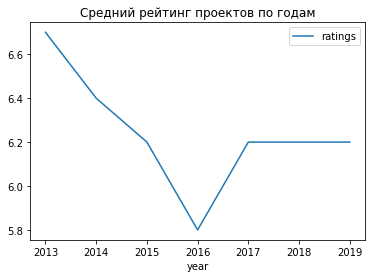

In [120]:
# Оценим средний рейтинг проектов по годам
data_sup['total_support'] = data_sup['refundable_support'] + data_sup['nonrefundable_support']
data_sup.pivot_table(index='year', values='ratings', aggfunc='median').plot(title='Средний рейтинг проектов по годам')

Средний рейтинг софинансируемых проектов держится на уровне 5.8-6.6

В прокате есть периоды в течение года, когда популярность кинотеатров как вида досуга возрастает. Попробуем выделить это на графиках

In [131]:
# Для начала, выделим столбец со значением месяца релиза
data_sup['month'] = data['show_start_date'].dt.month
data_sup.head(5)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,genres,box_office,year,main_director,main_genres,budget_support_ratio,box_office_mln,payback,total_support,month
1281,Пока еще жива,111005313,2013-10-11 12:00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.0,...,"драма,мелодрама",365353.6,2013,А.Атанесян,драма,0.333703,0.37,0.004601,26500000.0,10
1448,Бесславные придурки,111003314,2014-03-28 12:00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.0,...,NaN,28140.0,2014,А.Якимчук,NaN,0.700000,0.03,0.000758,26000000.0,3
1498,Невидимки,111004213,2013-09-10 12:00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.0,...,"комедия,фантастика",19957031.5,2013,Р.Давлетьяров,комедия,0.612691,19.96,0.113377,107847945.0,9
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.0,...,драма,55917.5,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,0.690095,0.06,0.001378,28000000.0,5
1792,Братья Ч,111004414,2014-04-23 12:00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.0,...,драма,232100.0,2014,М.Угаров,драма,0.624764,0.23,0.005800,25000000.0,4


<AxesSubplot:title={'center':'Средние кассовые сборы фильмов по дате релиза'}, xlabel='month'>

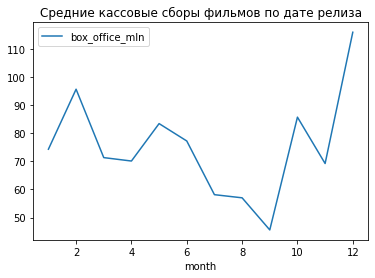

In [134]:
box_office_mean_month = data.pivot_table(index='month', values='box_office_mln', aggfunc='mean')
box_office_mean_month.plot(title='Средние кассовые сборы фильмов по дате релиза')

<AxesSubplot:xlabel='month'>

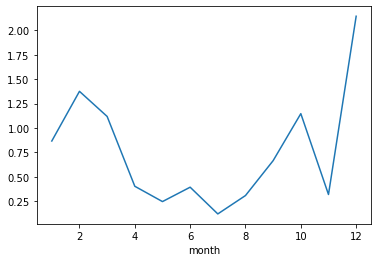

In [140]:
data_sup.groupby('month')['payback'].mean().plot()

График подтверждает предположение о том что месяц релиза картин в кинотеатрах сказывается на кассовых сборах, есть явный тренд снижения сборов к концу лета - началу осени, а затем самый пик в декабре.
<br>
Та же картина с окупаемостью, релиз в декабре обеспечивает окупаемость в два раза выше чем в среднем по остальным месяцам.

### Шаг 5. Напишите общий вывод

В процессе исследования мы работали с двумя источниками данных, с основной таблицей с фильмами и информацией по ним и с таблицей с кассовыми сборами. Объединили их по столбцу с прокатными удостоверениями. 
<br>
Затем провели предобработку данных. Все типы данных привели в соответствии с их содержанием. Удалили несущественную часть строк с пропусками, остальные пропуски оставили как есть, часть заменили на "Не указано". Выявили и проанализировали дубликаты по названию фильмов и прокатным удостоверениям. Изучили категориальные и количественные значения, добавили столбцы с необходимыми данными для анализа. 
<br>
Провели исследовательский анализ данных. Изучили рынок, исследовали основные параметры и зависимости имеющихся метрик, развитие рынка. 
<br>
Отдельно исследовали фильмы с государственным софинансированием. Изучили их окупаемость, кассовые сборы, рейтинг, возрастные ограничения и взаимное влияние данных параметров. 
<br>
Далее приведем основные выводы.
<br>
Период 2010-2013 годов слабо охвачен данными по кассовым сборам. С 2015 года общий объем кассовых сборов в кинотеатрах составляет около 50 млрд рублей. 
<br>
В среднем фильмы собирают в прокате в кинотеатрах не более 10 млн рублей. При этом есть не малая часть фильмов снятых достаточно давно, на которые оформлялось ПУ для разовых показов в кинотеатрах с минимальными кассовыми сборами. Эти фильмы также попадают в исследование данных по кассовым сборам.
<br>
С 2014 года объем ежегодного государственного софинансирования держится на уровне 3-4 млрд рублей. Окупаемость фильмов за счет проката в кинотеатрах растет с 2014 года с 60% от объема вложений до 85% в 2019 году, превысов отметку 100% в 2017 и 2018 годах.
Байопики и спортивные драммы лучше окупаются в отличие от мелодрам.
<br>
Маркировка возрастных ограничений 6+ обеспечивает максимальный охват аудитории и соответсвенно максимальные сборы, однако суммарно, фильмы с 16+ ежегодно собирают больше, за счет количества таких фильмов в прокате.
<br>
Средний рейтинг субсидируемых фильмов держится в районе 6.5, не зависит от бюджета или объема софинансирования.
<br>
Дата премьеры влияет на финансовый успех картин, релиз в декабре обеспечивает лучшие кассовые сборы в сравнии с другими периодами года.
<br>
Рекомендации по исходным данным.
<br>
Необходимо отметить ограниченную полноту данных по годам и отсутсвие финансовых метрик зарубежных фильмов. Данные стоит дополнить информацией по рекламным бюджетам и актерам (главные роли).